# Fast and Robust Earth Mover’s Distances

# 快速和强大的地球移动的距离

# Abstract

# 摘要



We present a new algorithm for a robust family of Earth Mover’s Distances - EMDs with thresholded ground distances. The algorithm transforms the flow-network of the EMD so that the number of edges is reduced by an order of magnitude. As a result, we compute the EMD by an order of magnitude faster than the original algorithm, which makes it possible to compute the EMD on large histograms and databases. In addition, we show that EMDs with thresholded ground distances have many desirable properties. First, they correspond to the way humans perceive distances. Second, they are robust to outlier noise and quantization effects. Third, they are metrics. Finally, experimental results on image retrieval show that thresholding the ground distance of the EMD improves both accuracy and speed.

我们提出了一种新的算法，用于求解一类挖土机距离，EMD具有阈值。该算法对EMD的流网络进行了变换，使边的数量减少了一个数量级。因此，我们计算EMD的速度比原来的算法快了一个数量级，这使得在大型直方图和数据库中计算EMD成为可能。此外，我们还证明了具有阈值地面距离的EMD具有许多令人满意的特性。首先，它们与人类感知距离的方式相对应。其次，它们对离群噪声和量化效应具有鲁棒性。第三，它们是度量标准。最后，在图像检索方面的实验结果表明，对EMD的地面距离进行阈值处理，提高了算法的精度和速度。


# 1. Introduction

# 1. 介绍



Histograms are ubiquitous tools in numerous computer vision tasks. It is common practice to use distances such as L2 or χ2 for comparing histograms. This practice assumes that the histogram domains are aligned. However this assumption is violated through quantization, shape deformation, light changes, etc. The Earth Mover’s Distance (EMD) is a cross-bin distance that addresses this alignment problem. EMD is defined as the minimal cost that must be paid to transform one histogram1 into the other, where there is a “ground distance” between the basic features that are aggregated into the histogram. The EMD as defined by Rubner is a metric only for normalized histograms. However, recently Pele and Werman suggested EMD' and showed that it is a metric for all histograms.

直方图是许多计算机视觉任务中普遍存在的工具。常见的做法是使用距离L2或χ2等比较直方图。这种做法假设直方图域是对齐的。然而，这一假设被量化、形状变形、光线变化等破坏了。推土机距离(EMD)是一个跨仓的距离，解决了这个对准问题。EMD被定义为将一个直方图转换为另一个直方图所必须付出的最小代价，其中在汇总成直方图的基本特征之间有一个“地面距离”。Rubner定义的EMD是一个仅用于标准化直方图的度量。然而，最近贝利和沃曼提出EMD'，并表明它是所有直方图的度量标准。



A major issue that arises when using EMD is which ground distance to use for the basic features. This, of course, depends on the histograms, the task and practical considerations. In many cases we would like the distance to correspond to the way humans perceive distances (image retrieval, for example). In other cases we would like the distance to fit the distribution of the noise (keypoint matching, for example). Practical considerations include speed of computation and the metric property that enables fast algorithms for nearest neighbor searches, fast clustering and large margin classifiers.

使用EMD时出现的一个主要问题是基本特性使用的地面距离。当然，这取决于图表、任务和实际考虑。在许多情况下，我们希望距离与人类感知距离的方式相对应(例如，图像检索)。在其他情况下，我们希望距离适合噪音的分布(例如，关键点匹配)。实际考虑的因素包括计算速度和度量特性，该特性使最近邻搜索、快速聚类和大型边界分类器的快速算法成为可能。

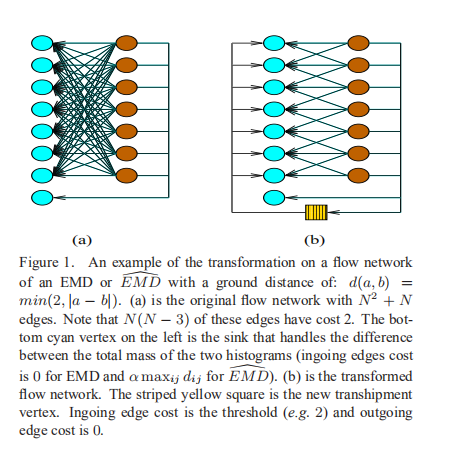

We propose using thresholded ground distances. i.e. distances that saturate to a constant value. These distances have many desirable properties. First, saturated distances correspond to the way humans perceive distances. Second, many natural noise distributions have a heavy tail; i.e. outlier noise. Thresholded distances assign different outliers the same large distance. Finally, we present an algorithm that computes EMD with a thresholded ground distance faster by an order of magnitude than the original algorithm. The algorithm transforms the flow-network of the EMD so that the number of edges is reduced by an order of magnitude (see Fig. 1).

我们建议使用阈值地面距离。即饱和到一个常数值的距离。这些距离有许多理想的性质。首先，饱和距离对应于人类感知距离的方式。第二，许多自然噪声分布有一个沉重的尾巴;如异常噪音。阈值距离为相同的大距离分配不同的离群值。最后，我们提出了一种计算带阈值地面距离的EMD的算法，它比原算法快了一个数量级。该算法对EMD的流网络进行了变换，使边的数量减少了一个数量级(见图1)。



The Earth Mover’s Distance has been used successfully in many applications such as image retrieval, edge and corner detection, keypoint matching, near duplicate image identification, classification of texture and object categories, NMF and contour matching. Many of these works used saturated distances, usually the negative exponent function. The major contribution of this paper is a fast algorithm for the computation of the EMD with thresholded ground distance. We argue that thresholded distances have all the benefits of the negative exponent function that is typically used as a saturated distance; its big advantage is its much shorter computation time.

该算法在图像检索、边缘和角点检测、关键点匹配、近重复图像识别、纹理和目标分类、NMF和轮廓匹配等方面都得到了成功的应用。这些作品大多使用饱和距离，通常是负指数函数。本文的主要贡献是提出了一种计算带阈值地面距离的EMD的快速算法。我们认为阈值距离具有负指数函数的所有优点，负指数函数通常用作饱和距离;它的最大优点是计算时间短得多。



This paper is organized as follows. Section 2 is an overview of previous work. Section 3 describes the Earth Mover’s Distance. Section 4 discusses thresholded distances and proves that they are metrics. Section 5 describes the fast algorithm. Section 6 presents the results. Finally, conclusions are drawn in Section 7.

本文组织如下。第二部分是以前工作的概述。第三节描述了推土机距离。第4节讨论了阈值距离，并证明了它们是度量。第5节描述了快速算法。第6节给出了结果。最后，在第七部分得出结论。


# 2. Previous Work

# 2. 以前的工作



This section first describes EMD algorithms. Second, it describes the use of saturated ground distances in the EMD framework.

本节首先介绍EMD算法。其次，描述了EMD框架中饱和地距的使用。



## 2.1. EMD Algorithms

## 2.1。EMD算法



Early work using cross-bin distances for histogram comparison can be found in . Shen and Wong suggested unfolding two integer histograms, sorting them and then computing the L1 distance between the unfolded histograms. To compute the modulo matching distance between cyclic histograms they took the minimum from all cyclic permutations. This distance is equivalent to the EMD between two normalized histograms. Werman et al. showed that this distance is equal to the L1 distance between the cumulative histograms. They also proved that matching two cyclic histograms by only examining cyclic permutations is optimal. Werman et al. proposed an O(M log M) algorithm for finding a minimal matching between two sets of M points on a circle. The algorithm was adapted by Pele and Werman to compute the EMD between two N-bin, normalized histograms with time complexity O(N). Peleg et al. suggested using the EMD for grayscale images and using linear programming to compute it. Rubner et al. suggested using the EMD for color and texture images and generalized the definition of the EMD to non-normalized histograms. They computed the EMD using a specific linear programming algorithm - the transportation simplex. The algorithm’s worst case time complexity is exponential. Practical run time was shown to be super-cubic. Interior-point algorithms or Orlin’s algorithm both have a time complexity of O(N^3 logN) and can also be used.

早期使用cross-bin距离进行直方图比较的工作可以在Shen和Wong建议展开两个整数直方图，对它们进行排序，然后计算展开直方图之间的L1距离。为了计算循环直方图之间的模匹配距离，他们从所有循环排列中取最小值。这个距离等于两个归一化直方图之间的EMD。Werman等人证明了这个距离等于累积直方图之间的L1距离。他们还证明了仅通过检查循环排列来匹配两个循环直方图是最优的。Werman等人提出了一种O(M log M)算法来寻找圆上的M个点之间的最小匹配。该算法由Pele和Werman采用，计算两个N-bin之间的EMD，归一化直方图，时间复杂度为O(N)。Peleg等人建议对灰度图像使用EMD，并使用线性规划来计算它。Rubner等人建议对颜色和纹理图像使用EMD，并将EMD的定义推广到非归一化直方图。他们使用一种特殊的线性规划算法——运输单纯形来计算EMD。算法最坏情况下的时间复杂度是指数级的。实际运行时间被证明是超立方的。内部点算法或Orlin算法的时间复杂度都是O(N^3 logN)，也可以使用。



Ling and Okada proposed EMD-L1. EMD with L1 as the ground distance. They showed that if the points lie on a Manhattan network , the number of variables in the LP problem can be reduced from O(N^2) to O(N). To execute the EMD-L1 computation, they employed a tree-based algorithm, Tree-EMD. Tree-EMD exploits the fact that a basic feasible solution of the simplex algorithm-based solver forms a spanning tree when the EMD-L1 is modeled as a network flow optimization problem. The worst case time complexity is exponential. Empirically, they showed that this algorithm has an average time complexity of O(N2). Gudmundsson et al. also put forward this simplification of the LP problem. They sug gested an O(N logdd1 N) algorithm that creates a Manhattan network for a set of N points in Rd . The Manhattan network has O(N log^(d-1) N) vertices and edges. Thus, using Orlin’s algorithm the EMD-L1 can be computed with a time complexity of O(N^2 log^(2d-1) N). Indyk and Thaper proposed approximating EMD-L1 by embedding it into the L1 norm. Embedding time complexity is O(N d log ∆), where N is the feature set size, d is the feature space dimension and ∆ is the diameter of the union of the two feature sets. Grauman and Darrell  substituted L1 with histogram intersection in order to approximate partial matching. Shirdhonkar and Jacobs  presented a linear-time algorithm for approximating EMD-L1 for low dimensional histograms using the sum of absolute values of the weighted wavelet coefficients of the difference histogram. Lv et al. proposed embedding an EMD with thresholded ground distance into the L1 norm. Khot and Naor showed that any embedding of the EMD over the d-dimensional Hamming cube into L1 must incur a distortion of Ω(d), thus losing practically all distance information. Andoni et al. [5] showed that for sets with cardinalities upper bounded by a parameter s, the distortion reduces to O(log s log d). A practical reduction in accuracy due to the approximation was reported by [12, 23, 35]. In order to increase precision, Grauman and Darrell [12] and Lv et al. [23] used the approximation as a filter that returns a set of similar objects, and then used the exact EMD computation to rerank these objects. Khanh Do Ba et al. [6] presented optimal algorithms for estimating EMD-L1 or EMD with a tree-metric as the ground distance.

Ling和Okada提出了EMD-L1。以L1为接地距离的EMD。他们证明，如果这些点位于一个曼哈顿网络上，那么LP问题中的变量数可以从O(N²)减少到O(N)。为了执行EMD-L1的计算，他们使用了一种基于树的算法——树emd。当EMD-L1被建模为一个网络流优化问题时，树- emd利用了基于单纯形算法的求解器的一个基本可行解形成一个生成树的事实。最坏情况下，时间复杂度是指数级的。经验表明，该算法的平均时间复杂度为O(N2)。Gudmundsson等人也提出了这种LP问题的简化。他们研究了O(N logdd1 N)算法，该算法为Rd中的N个点创建了一个曼哈顿网络。曼哈顿网络有O(N log^(d-1) N)个顶点和边。因此，利用Orlin算法，EMD-L1的计算时间复杂度为O(N^2 log^(2 -1) N)。Indyk和Thaper提出将EMD-L1嵌入到L1范数中，近似计算EMD-L1。嵌入时间复杂度为O(N d log∆)，其中N为特征集大小，d为特征空间维数，∆为两个特征集联合的直径。为了近似部分匹配，Grauman和Darrell用直方图相交代替L1。Shirdhonkar和Jacobs提出了一种基于差分直方图加权小波系数绝对值和的EMD-L1低维直方图近似的线性时间算法。Lv等人提出将阈值接地距离的EMD嵌入到L1范数中。Khot Naor表明任何嵌入的EMD采用汉明立方体到L1必须产生一个扭曲Ω(d),从而失去了几乎所有的距离信息。Andoni等人的[5]表明，对于以参数s为上界的基数集，失真减小到O(log s log d)。为了提高精度，Grauman和Darrell[12]和Lv等人使用近似作为一个过滤器，返回一组相似的对象，然后使用精确的EMD计算重新排序这些对象。Khanh Do Ba等人提出了以树度量为地面距离估计EMD- l1或EMD的最优算法。



Pele and Werman proposed EMD'- a new defi- nition of the EMD for non-normalized histograms. They showed that unlike Rubner’s definition, the EMD' is also a metric for non-normalized histograms. In addition, they proposed a linear-time algorithm that computes the EMD' with a ground distance of 0 for corresponding bins, 1 for adjacent bins and 2 for farther bins and for the extra mass.

Pele和Werman提出了EMD'——非标准化直方图EMD的一种新定义。他们表明，与Rubner的定义不同，EMD'也是非标准化直方图的度量。此外，他们还提出了一种线性时间算法，计算EMD’，对于相应的箱子，地面距离为0，对于相邻的箱子为1，对于较远的箱子和额外的质量为2。



## 2.2. Saturated Ground Distances with the EMD

## 2.2 EMD的饱和地面距离



Rubner et al. [29] and Ruzon and Tomasi [30] used a negative exponent function to saturate their ground distance for the tasks of image retrieval and edge detection, respectively. The negative exponent function practically saturates large distances to a fixed threshold (see Fig. 2). The negative exponent function is used for saturating a metric, because it does not break the triangle inequality. We show that this is true as well for a thresholding function. Note that saturating with a negative exponent might have the drawback of changing the behavior of small distances (see Fig. 2).

Rubner et al.[29]和Ruzon和Tomasi[30]分别在图像检索和边缘检测任务中使用负指数函数来饱和它们的地面距离。负指数函数实际上是将很大的距离饱和到一个固定的阈值(参见图2)。负指数函数用于使度规饱和，因为它没有打破三角形不等式。我们证明了这对于阈值函数也是成立的。注意，负指数饱和可能会改变小距离的行为(见图2)。



Lv et al. [23] conducted image retrieval experiments from a database of 10000 images. They showed that thresholding the ground distance improves precision.

Lv等人[23]对一个包含10000张图像的数据库进行了图像检索实验。他们证明了对地面距离进行阈值处理可以提高精度。



Pele and Werman [26] compared several distances for the task of SIFT matching. They proposed an EMD' variant. The ground distance of this EMD' is 0 for corresponding bins, 1 for adjacent bins and 2 for farther bins and for the extra mass; i.e. a thresholded distance. They showed that this distance improves SIFT matching, while EMD' with non-thresholded distances negatively affects performance.

Pele和Werman[26]为SIFT匹配任务比较了几个距离。他们提出了EMD的变体。该EMD’的接地距离对应箱体为0，相邻箱体为1，较远箱体和额外质量为2;即阈值距离。他们表明，这个距离提高了SIFT匹配，而具有非阈值距离的EMD'对性能有负面影响。



# 3. The Earth Mover’s Distance

# 3.地球移动者的距离



The Earth Mover’s Distance (EMD) is defined as the minimal cost that must be paid to transform one histogram into the other, where there is a “ground distance” between the basic features that are aggregated into the histogram.

Earth Mover’s Distance (EMD)被定义为将一个直方图转换为另一个直方图所必须支付的最小成本，其中在汇总到直方图中的基本特征之间存在一个“地面距离”。



Given two histograms P, Q the EMD as defined by Rubner et al. [29] is: where {fij} denotes the flows. Each fij represents the amount transported from the ith supply to the jth demand.

给定两个直方图P, Rubner et al.[29]定义的EMD为:其中{fij}表示流程。每个fij表示从第i个供应到第j个需求的传输量。



We call dij the ground distance between bin i and bin j in the histograms. Pele and Werman [26] suggested EMD':

我们称dij为直方图中bin i和bin j之间的地面距离。Pele和Werman[26]建议EMD':



Pele and Werman proved that EMD' is a metric for any two histograms if the ground distance is a metric and α ≥ 0.5 [26]. The metric property enables fast algorithms for nearest neighbor searches [41, 7]), fast clustering [10] and large margin classifiers [15, 36]. Because of these advantages we will use the Pele and Werman definition in the remainder of this paper (with α = 1).

贝利和沃曼证明EMD是任意两个直方图的指标如果地面距离度量和α≥0.5 [26]。metric属性支持最近邻搜索[41,7])、快速聚类[10]和大型边缘分类器的快速算法[15,36]。由于这些优势,我们将使用贝利和沃曼定义在本文的其余部分(α= 1)。



# 4. Thresholded Distances

# 4. 阈值距离



Thresholded distances are distances that saturate to a threshold; i.e. let d(a, b) be a distance measure between two features - a, b. The thresholded distance with a threshold of t > 0 is defined as: dt(a, b) = min(d(a, b), t).

阈值距离是指达到阈值的距离;设d(a, b)为两个特征点- a, b之间的距离测度，阈值为t > 0的阈值距离定义为:dt(a, b) = min(d(a, b)， t)。



We now prove that if d is a metric then dt is also a metric. Non-negativity and symmetry hold trivially, so we only need to prove that the triangle inequality holds.dt(a, b) + dt(b, c) ≥ dt(a, c) if d is a metric.

我们现在证明如果d是度规那么dt也是度规。非负性和对称性基本成立，所以我们只需要证明三角形不等式成立。如果d是度规，dt(a, b) + dt(b, c)≥dt(a, c)



We consider three cases:

我们考虑三种情况:

# 5. Fast Computation of the EMD with a Thresholded Ground Distance

# 5. 具有阈值地面距离的EMD的快速计算



This section describes an algorithm that computes EMD' or EMD with a thresholded ground distance an order of magnitude faster than the original algorithm . 

本节描述一种计算EMD'或EMD的算法，该算法的阈值地面距离比原始算法快一个数量级。



EMD' can be solved by a min-cost-flow algorithm. Our algorithm makes a simple transformation of the flow network that reduces the number of edges. If N is the number of bins in the histogram, the flow network of EMD' has exactly N2 + N edges (see (a) in Fig. 1). N2 edges connect all sources to all sinks. The extra N edges connect all sources to the sink that handles the difference between the total mass of the two histograms (we assume without loss of generality that the source histogram total mass is greater or equal to the sink histogram total mass).

EMD'可以用最小代价流算法求解。我们的算法对流网络进行了简单的变换，减少了边的数量。如果N是直方图中bin的个数，那么EMD’的flow network正好有N2 + N条边(见图1中的(a))。N2条边将所有的source连接到all sink。额外的N条边将所有源连接到sink, sink处理两个直方图的总质量之差(我们假定源直方图的总质量大于或等于sink直方图的总质量，但不失一般性)。



The transformation (see Fig. 1) first removes all edges with cost t. Second, it adds a new transhipment vertex. Finally we connect all sources to this vertex with edges of cost t and connect the vertex to all sinks with edges of cost 0.

这个变换(见图1)首先用代价t去除所有的边。其次，它添加了一个新的转运顶点。最后，我们用代价为t的边将所有源连接到这个顶点，用代价为0的边将顶点连接到所有汇聚点。



Let K be the average number of edges going out of each bin that have a cost different than the threshold t. The new flow network has NK + N edges from the original network, N edges connecting all sources to the transhipment vertex and N edges connecting the transhipment vertex to all sinks. Thus the total number of edges is N(K + 3). If K is a constant the number of edges is O(N) as opposed to the original Θ(N^2). Note that the new flow network is no longer a transportation problem, but a transhipment problem [2]. However, both are special cases of the min-cost- flow problem. Thus any algorithm that solves min-cost-flow can be used for both problems.

让K边的平均数量的每本成本不同阈值t。新流网络NK + N边从原始网络,N边缘连接所有来源的转运和N顶点连接转运顶点的边下沉。因此总边数N (K + 3)。如果K是一个常数边的数量是O (N),而不是原来的Θ(N ^ 2)。注意，新的流程网络不再是一个运输问题，而是一个转运问题[2]。然而，两者都是最小成本流动问题的特殊情况。因此，任何求解最小成本流的算法都可以用于这两个问题。



Let K = O(1); the min-cost-flow optimization problem can be solved with a worst case time complexity of:

设K = O(1);最坏情况时间复杂度为



The algorithms are taken from: Ahuja et al. [1], Edmonds and Karp [9], used with Ahuja et al.’s shortest path algorithm [3], Edmonds and Karp [9], used with Fredman and Tarjan’s shortest path algorithm [11] and Orlin [25]. Algorithms with a C term assume integral cost coefficients that are bounded by C. Algorithms with a U term assume integral supply and demands that are bounded by U.

算法来自:Ahuja et al. [1]， Edmonds和Karp[9]，与Ahuja et al.的最短路径算法[3]，Edmonds和Karp[9]，与Fredman和Tarjan的最短路径算法[11]和Orlin[25]。有C项的算法假设总成本系数以C为界，有U项的算法假设总供给和总需求以U为界。



We now prove that the original and the transformed flow networks have the same minimum-cost solution. Let O be the original flow network and let T be the transformed flow network. We first show how to create a feasible flow in T , given a feasible flow in O. Both flows will have the same cost. This will prove that the min-cost-flow solution for T is smaller or equal to the min-cost-flow solution for O.

我们现在证明了原流程网络和转换后的流程网络具有相同的最小成本解决方案。设O为原始流网络，设T为变换后的流网络。我们首先展示如何在T中创建一个可行的流程，给定一个可行的流程在o中。两个流程将有相同的成本。这将证明T的最小成本流解小于或等于O的最小成本流解。



Given a feasible flow in O, all flows on edges that were not removed are copied to the new flow for T . For flows on edges with the cost of the threshold, we transfer the flow through the transhipment vertex. This gives us a feasible flow in T with the same cost.

给定O中的一个可行流，所有未移除的边上的流都被复制到新的T流中。对于带有阈值代价的边上流，我们通过转运顶点转移流。这给了我们一个可行的流动在T中以同样的代价。



We now show how to create a feasible flow in O, given a feasible flow in T . The flow in O will have a cost smaller or equal to the cost of the flow in T . This will prove that the min-cost-flow solution for T is greater or equal to the min-cost-flow solution for O. Together with the previous proof, this shows that the two flow networks have the same min-cost solution.

我们现在展示如何在给定T中的可行流的情况下，创建O中的可行流。输入O的代价小于或等于输入T的代价。这将证明T的最小代价流解大于或等于o的最小代价流解。结合前面的证明，这表明两个流网络具有相同的最小代价解。



Given a feasible flow in T , all flows on edges not connected to the transhipment vertex are copied to O. Second, each unit of mass that flows from vertex i to the transhipment vertex and then from the transhipment vertex to vertex j is transferred directly from vertex i to vertex j. We note that this is possible since O is fully bi-partite. We also note that the cost of the new flow will be smaller or equal to the cost of the flow in T as all edges in O have a cost smaller or equal to the threshold. This completes the proof.

给定一个可行流T,所有流边缘不连接到转运顶点被复制到O .第二,每单位质量流从顶点我转运的顶点,然后从转运顶点到顶点j转移直接从顶点到顶点j。我们注意到O完全bi-partite以来这是可能的。我们还注意到，新流的成本将小于或等于T中的流的成本，因为O中的所有边的成本都小于或等于阈值。这就完成了证明。



It is noteworthy that the algorithmic technique presented in this paper can be applied not only with thresholded ground distance, but in any case where a group of vertexes can be connected to another group with the same cost. For example, we can add a transhipment vertex for all vertexes with a specific color (e.g. blue) such that the cost of the transportation between them will be smaller than the cost of the transportation to other colors.

值得注意的是，本文提出的算法技术不仅可以应用于阈值接地距离，而且在任意情况下，一组顶点可以以相同的代价连接到另一组顶点。例如，我们可以为具有特定颜色(例如蓝色)的所有顶点添加一个转运顶点，这样它们之间的运输成本就会比运输到其他颜色的成本要小。



## 5.1. Implementation notes 

## 5.1。实现注意事项



Flow-netowrk set-up time. For a fixed histogram configuration (e.g. SIFT) the flow-network can be precomputed once. For sparse histograms (signatures), the flow-network set-up time complexity is O(MN); where N is the number of non-zero bins and M is the average number of neighbors that need to be checked if the distance is lower than the threshold. M is at most N but it can be lower. For example, let t be the threshold. If we are comparing two images and the ground distance is a linear combination of the spatial distance and the color distance, then the distance computation to vertexes with L1 distance bigger or equal to t can be skipped. That is, the set-up time in this case is O(min(t2N, N2 )). 

Flow-netowrk设置时间。对于固定的直方图配置(如SIFT)，流网络可以预先计算一次。对于稀疏直方图(签名)，流网络建立的时间复杂度为O(MN);其中N为非零箱数，M为距离小于阈值时需要检查的邻居的平均数量。M最多是N，但它可以更小。例如，设t为阈值。如果我们比较两幅图像，并且地面距离是空间距离和颜色距离的线性组合，那么可以跳过L1距离大于或等于t的顶点的距离计算。也就是说，本例中的设置时间是O(min(t2N, N2))。



Pre-flowing Monge sequences. A Monge sequence contains edges in the flow-network that can be pre-flowed (in the order of the sequence) without changing the mincost solution [24, 16]. For example, if the ground-distance is a metric, zero-cost edges are Monge sequence [38]. Alon et al. [4] introduced an efficient algorithm which determines the longest Monge sequence. 

Pre-flowing蒙日序列。Monge序列包含流动网络中的边，这些边可以在不改变最小代价解的情况下(按照序列的顺序)预先流动[24,16]。例如，如果对地距离是一个度量，那么零成本边就是Monge序列[38]。Alon等人提出了一种确定最长Monge序列的高效算法。



Pre-flowing to/from isolated nodes. If a source is connected only to the new transhipment vertex, we can pre-flow all its mass to the transhipment vertex and eliminate it. If a sink is connected only to the transhipment vertex, we can add its deficit to the transhipment vertex and eliminate it.

预流动到/从孤立节点。如果一个源只连接到新的转运顶点，我们可以将它的所有质量预先流到转运顶点并消除它。如果一个汇聚只连接到转运顶点，我们可以将其亏损添加到转运顶点并消除它。

# 6. Results

# 6. 结果



In this section we present results for image retrieval. However, note that we do not claim that this is the optimal way to achieve image retrieval. Image retrieval is used here as an example of an application where the EMD has already been used, to show that thresholded distances yield good results. The major contribution is the faster algorithm. We show that by using our algorithm the running time decreases by an order of magnitude.

在本节中，我们将给出图像检索的结果。但是，请注意，我们并没有声称这是实现图像检索的最佳方法。这里使用图像检索作为已经使用EMD的应用程序的一个例子，以表明阈值距离产生良好的结果。主要的贡献是更快的算法。我们证明，通过使用我们的算法，运行时间减少了一个数量级。



We use a database that contains 773 landscape images from the COREL database, that were also used in Wang et al. [37]. The dataset contains 10 classes3 : People in Africa, Beaches, Outdoor Buildings, Buses, Dinosaurs, Elephants, Flowers, Horses, Mountains and Food. The number of images in each class ranges from 50 to 100.

我们使用的数据库包含来自COREL数据库的773幅景观图像，Wang等人也使用过这些图像。数据集包含10类3:非洲人、海滩、户外建筑、公共汽车、恐龙、大象、花朵、马、山脉和食物。每个类中的图像数量从50到100不等。



From each class we selected 5 images as query images (numbers 1, 10, . . . , 40). Then we searched for the 50 nearest neighbors for each query image. We computed the distance of each image to the query image and its reflection and took the minimum. We present results for three types of image representations: histograms of orientations, L*a*b*color space and finally linear combinations of the two. We conclude this section with running times.

从每个类中我们选择了5个图像作为查询图像(数字1,10，…,40)。然后，我们为每个查询图像查找50个最近的邻居。我们计算每个图像到查询图像及其反射的距离，并取其最小值。我们给出了三种图像表示的结果:方向直方图，L*a*b*颜色空间，最后是两者的线性组合。我们以运行时间结束本节。



## 6.1. SIFT

## 6.1 SIFT



Our first image representation is orientation histograms. The first representation - SIFT is a 6×8×8 SIFT descriptor [21] computed globally on the whole image. The second representation - CSIFT is a SIFT-like descriptor. This descriptor tackles two problems related to the SIFT descriptor for color image retrieval. First, it takes into account color edges by computing the SIFT descriptor on the compass edge image [30]. Note that on an edge image there should be no distinction between opposite directions (0 and 180 for example). Thus, opposite directions are considered equal.The second drawback of the SIFT descriptor for color image retrieval is its normalization. The normalization is problematic as we lose the distinctive cue of the amount of edge points in the image. In the CSIFT computation we skip the normalization step. The final CSIFT descriptor has 6×8×8 bins. We used the following distances for these descriptors: L1, L2, χ2 , EMD-L1 [20], SIFTDIST [26] and EMD'. Let M be the number of orientation bins. The ground distances between bins (xi , yi , oi) and (xj , yj , oj ) we use are:

我们的第一个图像表示是方向直方图。第一个表示—SIFT是在整个图像上全局计算的6×8×8 SIFT描述符[21]。第二个表示—CSIFT是一个类似于sift的描述符。这个描述符解决了与颜色图像检索的SIFT描述符相关的两个问题。首先，它通过计算compass边缘图像[30]上的SIFT描述符来考虑颜色边缘。请注意，在边缘图像上，在相反的方向之间应该没有区别(例如，0和180)。因此，相反的方向被认为是相等的。用于彩色图像检索的SIFT描述符的第二个缺点是其规范化。归一化是有问题的，因为我们失去了图像中边缘点数量的独特线索。在CSIFT计算中，我们跳过了标准化步骤。最后的CSIFT描述符有6×8×8个箱子。我们使用以下这些描述符的距离:L1、L2,χ2,EMD-L1 [20], SIFTDIST[26]和EMD”。设M为有向垃圾箱的个数。我们使用的bin (xi, yi, oi)与(xj, yj, oj)之间的地面距离为:



The results are given in Fig. 4(a). Due to lack of space we present for each distance measure, the descriptor with which it performed best. Results of all pairs of descriptors and distance measures can be found at: http://www.cs.huji.ac.il/˜ofirpele/FastEMD/. The EMD' with a thresholded ground distance performs much better than EMD' with a non-thresholded ground distance. In fact, while EMD' with a non-thresholded ground distance negatively affects performance, EMD' with a thresholded ground distance improves performance. L1 is equivalent to EMD' with the Kroncker δ ground distance [26]. SIFTDIST is the sum of EMD' over all the spatial cells (each spatial cell contains one orientation histogram). The ground distance for the orientation histograms is: min(|oi oj |, M − |oi oj |, 2). It was shown in [26] and here that this addition of a small invariance to the orientations shifts improves performance. Our distance also adds a small invariance to spatial shifts and thus improves performance even more. However, using a non-thresholded distance adds too much invariance at the expense of distinctiveness, thus reducing performance.

结果如图4(a)所示。由于缺少空间，我们为每个距离度量提供描述符，描述符在其中表现最好。所有对描述符和距离措施的结果可以发现:http://www.cs.huji.ac.il/˜ofirpele / FastEMD /。带阈值地面距离的EMD'要比带非阈值地面距离的EMD'执行得好得多。事实上，具有非阈值地面距离的EMD'会对性能产生负面影响，而具有阈值地面距离的EMD'会提高性能。与Kroncker L1相当于EMD的δ地面距离[26]。SIFTDIST是所有空间单元的EMD'之和(每个空间单元包含一个方向直方图)。方向直方图的地面距离为:min(|oi oj |， M−|oi oj |， 2)。我们的距离还为空间变化增加了一个小的不变性，从而进一步提高了性能。但是，使用非阈值距离增加了太多的不变性，从而降低了性能。



## 6.2. L*a*b* Color Space

## 6.2。L * a * b *颜色空间



The state of the art color distance is ∆00 - ciede2000 on L*a*b* color space[22, 32] (see also Fig. 2). Thus, our second type of image representation is simply a resized color image in the L*a*b* space. We resized each image to 32 × 48 and converted them to L*a*b* space. Let I1, I2 be

art color distance的状态为∆00 - ciede2000 on L*a*b* color space[22, 32](也见图2)，因此，我们的第二种图像表示就是在L*a*b*空间中重新调整大小的彩色图像。我们将每张图片的大小调整为32×48，并将其转换为L*a*b*空间。令I1 I2为



The results for EMD' with a non-thresholded ground distance are not reported here since the experiments have not finished running (more than ten days). Results are presented in Fig. 4(b). As shown, EMD' with a thresholded ground distance outperforms all other distances.

由于实验还没有结束(超过10天)，这里没有报道非阈值地面距离的EMD'的结果。结果如图4(b)所示。如图所示，带阈值地面距离的EMD'优于所有其他距离。



## 6.3. Color and SIFT Combined

## 6.3。颜色和筛混合



In the experiments described in this section, we used linear combinations of the orientation histograms and color.

在本节描述的实验中，我们使用了方向直方图和颜色的线性组合。



We combined the two best distances for each of the methods (note that each distance was normalized so that its average is 1):

我们将每种方法的两个最佳距离结合起来(注意，每个距离都经过了标准化，因此其平均值为1):



We used three different α values: 0.1, 0.3, 0.5. The results appear in Fig. 4(c)-(f). The combination of two EMD with thresholded distances performs best, especially for hard classes such as People in Africa and Food. The image results examples for one “Food” query image are given in Fig. 3. More image results can be found at:

我们使用三个不同的α值:0.1,0.3,0.5。结果如图4(c)-(f)所示。两种阈值距离的EMD组合表现最好，特别是对于非洲人和食物这样的困难阶层。一个“食物”查询图像的图像结果示例如图3所示。更多图像结果可在以下网址找到:



## 6.4. Running Time Results

## 6.4  运行时间结果



The algorithm we used for the computation of the EMD' is successive shortest path [2]. This algorithm has a worst time complexity of O(N2U log N). All runs were conducted on a Pentium 2.8GHz. A comparison of the practical running time of our algorithm and other methods are given in tables 1,2 and in Fig. 5. It is noteworthy that EMDL1 accuracy is much lower than our method and even lower than the simple L1 norm (see Fig. 4(a)). Indyk and Thaper [17] and Shirdhonkar and Jacobs [35] approximate EMDL1, so their accuracy is even lower. SIFTDIST gives good accuracy (second best, see Fig. 4(a)) and is faster than our method. Our method has better accuracy. More importantly, SIFTDIST is limited to a thresholded L1 norm with a threshold of 2 for 1-dimensional histograms. Our method is much more general. For example, SIFTDIST cannot be applied to colors. Lv et al. [23] report that their approximation runs 5 times faster than Rubner’s. Our method runs 75-700 times faster and returns the exact distance.

我们用来计算EMD'的算法是连续最短路径[2]。该算法的时间复杂度最坏为O(N2U log N)，所有运行都在奔腾2.8GHz上进行。我们的算法和其他方法的实际运行时间的比较如表1、表2和图5所示。值得注意的是，EMDL1的精度远低于我们的方法，甚至低于简单的L1范数(图4(a))。Indyk和Thaper[17]和Shirdhonkar和Jacobs[35]近似EMDL1，所以他们的准确性更低。SIFTDIST的精度较好(第二好，见图4(a))，比我们的方法更快。我们的方法准确度更高。更重要的是，对于一维直方图，SIFTDIST被限制在L1阈值为2的范围内。我们的方法更一般。例如，SIFTDIST不能用于颜色。Lv等人的[23]报告说，他们的近似比Rubner的快5倍。我们的方法运行速度快75-700倍，并返回准确的距离。

# 7. Conclusions

# 7. 结论



We presented a new family of Earth Mover’s Distances.

我们提出了地球移动距离的一个新系列。



Members of this family correspond to the way humans perceive distances, and are robust to outlier noise and quantization effects. We proved that they are metrics. We also proposed a fast algorithm. The algorithm runs an order of magnitude faster than the original algorithm, which makes it possible to compute the EMD on large histograms and databases. Experimental results show that EMD has the best performance when it is used with thresholded distances. This has also been shown by Rubner et al. [29] and Ruzon and Tomasi [30] for saturated distances, which are essentially thresholded. This has also been demonstrated for thresholded distances by Lv et al. [23] and

这个家族的成员与人类感知距离的方式相对应，并且对离群噪声和量化效应具有很强的鲁棒性。我们证明了它们是度量标准。我们还提出了一种快速算法。该算法的运行速度比原始算法快一个数量级，这使得在大型直方图和数据库中计算EMD成为可能。实验结果表明，在带阈值距离的情况下，EMD的性能最好。Rubner等人也证明了这一点，[29]Ruzon和Tomasi[30]对于饱和距离，本质上是阈值化的。Lv等人对阈值距离也证明了这一点



Pele and Werman [26]. Our results strengthen these findings. Most importantly, our paper shows that using a thresholded distance not only improves accuracy, but reduces the run time, using our algorithm. The speed can be further improved using techniques such as Bayesian sequential hypothesis testing [27]. The project homepage, including code (C++ and Matlab wrappers) is at: http://www.cs.huji.ac.il/˜ofirpele/FastEMD/.

贝利和沃曼[26]。我们的研究结果加强了这些发现。最重要的是，我们的论文表明，使用阈值距离不仅提高了精度，而且减少了运行时间，使用我们的算法。使用贝叶斯序贯假设检验[27]等技术可以进一步提高速度。项目主页,包括代码(c++和Matlab包装):http://www.cs.huji.ac.il/˜ofirpele/FastEMD/.